In [32]:
import geopandas as gpd
import pandas as pd

In [33]:
# Load the CSV files
work_arrival_times = pd.read_csv('work_arrival_times.csv')
locations = pd.read_csv('locations.csv')

# Merge the two datasets on the common column (e.g., 'employee_id')
employees = pd.merge(work_arrival_times, locations, on='employee_id')

# Display the merged dataset
employees.head()

,employee_id,date,work_arrival_time,expected_arrival,location
0,1600,2025-05-01,08:34:03,07:15:00,POINT (51.366577 35.67961)
1,1600,2025-05-02,08:29:40,07:15:00,POINT (51.366577 35.67961)
2,1600,2025-05-03,08:33:40,07:15:00,POINT (51.366577 35.67961)
3,1600,2025-05-04,07:39:25,07:15:00,POINT (51.366577 35.67961)
4,1600,2025-05-05,08:09:47,07:15:00,POINT (51.366577 35.67961)


In [36]:
# Convert time columns to datetime
employees['work_arrival_time'] = pd.to_datetime(employees['work_arrival_time'], format='%H:%M:%S').dt.time
employees['expected_arrival'] = pd.to_datetime(employees['expected_arrival'], format='%H:%M:%S').dt.time

# Display the updated DataFrame
employees.head()

,employee_id,date,work_arrival_time,expected_arrival,location
0,1600,2025-05-01,08:34:03,07:15:00,POINT (51.366577 35.67961)
1,1600,2025-05-02,08:29:40,07:15:00,POINT (51.366577 35.67961)
2,1600,2025-05-03,08:33:40,07:15:00,POINT (51.366577 35.67961)
3,1600,2025-05-04,07:39:25,07:15:00,POINT (51.366577 35.67961)
4,1600,2025-05-05,08:09:47,07:15:00,POINT (51.366577 35.67961)


In [38]:
# Convert time columns to datetime for subtraction
employees['work_arrival_datetime'] = pd.to_datetime(employees['date'] + ' ' + employees['work_arrival_time'].astype(str))
employees['expected_arrival_datetime'] = pd.to_datetime(employees['date'] + ' ' + employees['expected_arrival'].astype(str))

# Calculate delay in minutes
employees['delay_minutes'] = (employees['work_arrival_datetime'] - employees['expected_arrival_datetime']).dt.total_seconds() / 60

# Display the updated employees dataset
employees.head()

,employee_id,date,work_arrival_time,expected_arrival,location,work_arrival_datetime,expected_arrival_datetime,delay_minutes
0,1600,2025-05-01,08:34:03,07:15:00,POINT (51.366577 35.67961),2025-05-01 08:34:03,2025-05-01 07:15:00,79.050000
1,1600,2025-05-02,08:29:40,07:15:00,POINT (51.366577 35.67961),2025-05-02 08:29:40,2025-05-02 07:15:00,74.666667
2,1600,2025-05-03,08:33:40,07:15:00,POINT (51.366577 35.67961),2025-05-03 08:33:40,2025-05-03 07:15:00,78.666667
3,1600,2025-05-04,07:39:25,07:15:00,POINT (51.366577 35.67961),2025-05-04 07:39:25,2025-05-04 07:15:00,24.416667
4,1600,2025-05-05,08:09:47,07:15:00,POINT (51.366577 35.67961),2025-05-05 08:09:47,2025-05-05 07:15:00,54.783333


In [40]:
employees = employees.drop(columns=['date', 'work_arrival_time', 'expected_arrival'])
employees.head()

KeyError: "['date', 'work_arrival_time', 'expected_arrival'] not found in axis"

In [41]:
employees

,employee_id,location,work_arrival_datetime,expected_arrival_datetime,delay_minutes
0,1600,POINT (51.366577 35.67961),2025-05-01 08:34:03,2025-05-01 07:15:00,79.050000
1,1600,POINT (51.366577 35.67961),2025-05-02 08:29:40,2025-05-02 07:15:00,74.666667
2,1600,POINT (51.366577 35.67961),2025-05-03 08:33:40,2025-05-03 07:15:00,78.666667
3,1600,POINT (51.366577 35.67961),2025-05-04 07:39:25,2025-05-04 07:15:00,24.416667
4,1600,POINT (51.366577 35.67961),2025-05-05 08:09:47,2025-05-05 07:15:00,54.783333
...,...,...,...,...,...
1266,1640,POINT (51.406403 35.772143),2025-05-27 07:28:12,2025-05-27 07:15:00,13.200000
1267,1640,POINT (51.406403 35.772143),2025-05-28 08:54:28,2025-05-28 07:15:00,99.466667
1268,1640,POINT (51.406403 35.772143),2025-05-29 07:39:30,2025-05-29 07:15:00,24.500000
1269,1640,POINT (51.406403 35.772143),2025-05-30 07:43:45,2025-05-30 07:15:00,28.750000


In [42]:
from shapely.wkt import loads

# Convert the 'location' column to geometry
employees['geometry'] = employees['location'].apply(loads)

# Create a GeoDataFrame
employees_gdf = gpd.GeoDataFrame(employees, geometry='geometry')

# Display the GeoDataFrame
employees_gdf.head()

,employee_id,location,work_arrival_datetime,expected_arrival_datetime,delay_minutes,geometry
0,1600,POINT (51.366577 35.67961),2025-05-01 08:34:03,2025-05-01 07:15:00,79.050000,POINT (51.36658 35.67961)
1,1600,POINT (51.366577 35.67961),2025-05-02 08:29:40,2025-05-02 07:15:00,74.666667,POINT (51.36658 35.67961)
2,1600,POINT (51.366577 35.67961),2025-05-03 08:33:40,2025-05-03 07:15:00,78.666667,POINT (51.36658 35.67961)
3,1600,POINT (51.366577 35.67961),2025-05-04 07:39:25,2025-05-04 07:15:00,24.416667,POINT (51.36658 35.67961)
4,1600,POINT (51.366577 35.67961),2025-05-05 08:09:47,2025-05-05 07:15:00,54.783333,POINT (51.36658 35.67961)


In [44]:
work_location="POINT (51.439152 35.715128)"

In [45]:
from shapely.geometry import Point

# Convert work_location to a Shapely Point
work_point = loads(work_location)

# Calculate the distance in meters
employees_gdf['distance_to_work_meters'] = employees_gdf['geometry'].apply(lambda geom: geom.distance(work_point) * 111139)

# Display the updated GeoDataFrame
employees_gdf.head()

,employee_id,location,work_arrival_datetime,expected_arrival_datetime,delay_minutes,geometry,distance_to_work_meters
0,1600,POINT (51.366577 35.67961),2025-05-01 08:34:03,2025-05-01 07:15:00,79.050000,POINT (51.36658 35.67961),8980.044232
1,1600,POINT (51.366577 35.67961),2025-05-02 08:29:40,2025-05-02 07:15:00,74.666667,POINT (51.36658 35.67961),8980.044232
2,1600,POINT (51.366577 35.67961),2025-05-03 08:33:40,2025-05-03 07:15:00,78.666667,POINT (51.36658 35.67961),8980.044232
3,1600,POINT (51.366577 35.67961),2025-05-04 07:39:25,2025-05-04 07:15:00,24.416667,POINT (51.36658 35.67961),8980.044232
4,1600,POINT (51.366577 35.67961),2025-05-05 08:09:47,2025-05-05 07:15:00,54.783333,POINT (51.36658 35.67961),8980.044232


In [51]:
# Calculate average delay
average_delay = employees_gdf['delay_minutes'].mean()

# Calculate average distance
average_distance = employees_gdf['distance_to_work_meters'].mean()

# Display the results
average_delay, average_distance

(np.float64(51.96035929714136), np.float64(15695.384240343961))

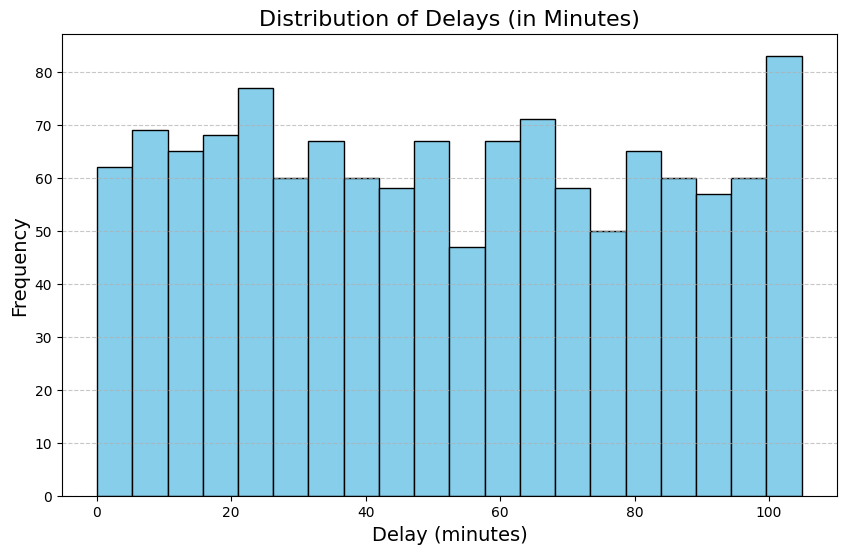

In [52]:
import matplotlib.pyplot as plt

# Plot a histogram of delays
plt.figure(figsize=(10, 6))
plt.hist(employees['delay_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delays (in Minutes)', fontsize=16)
plt.xlabel('Delay (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
import folium

# Create a map centered at the work location
m = folium.Map(location=map_center, zoom_start=12)

# Add a marker for the work location
folium.Marker(location=[work_point.y, work_point.x], popup="Work Location", icon=folium.Icon(color="red")).add_to(m)

# Add markers for home locations with employee_id in the popup
for idx, row in employees_gdf.iterrows():
    folium.Marker(location=[row['geometry'].y, row['geometry'].x], 
                  popup=f"Employee ID: {row['employee_id']}", 
                  icon=folium.Icon(color="blue")).add_to(m)

# Display the map
m

In [55]:
# Define delay categories
bins = [-float('inf'), 10, 30, float('inf')]
labels = ['On Time', 'Moderate Delay', 'Severe Delay']

# Classify delays
employees['delay_category'] = pd.cut(employees['delay_minutes'], bins=bins, labels=labels)

# Display the updated employees dataset
employees[['employee_id', 'delay_minutes', 'delay_category']].head()

,employee_id,delay_minutes,delay_category
0,1600,79.050000,Severe Delay
1,1600,74.666667,Severe Delay
2,1600,78.666667,Severe Delay
3,1600,24.416667,Moderate Delay
4,1600,54.783333,Severe Delay


In [56]:
import matplotlib.pyplot as plt

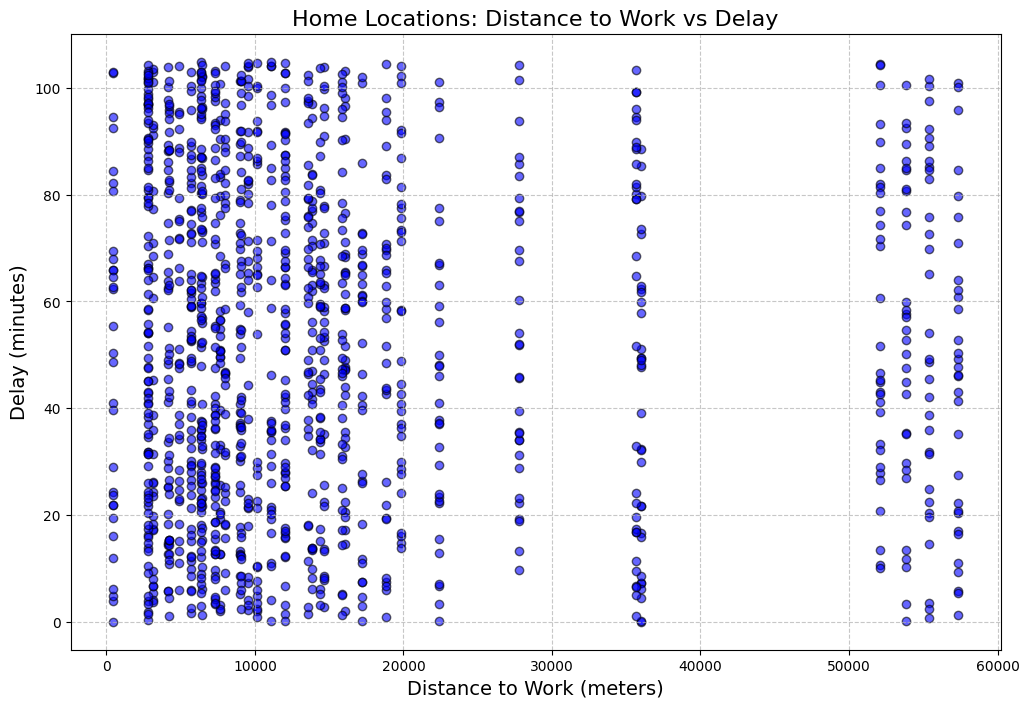

In [58]:
import matplotlib.pyplot as plt

# Scatter plot of distance vs delay
plt.figure(figsize=(12, 8))
plt.scatter(employees_gdf['distance_to_work_meters'], employees_gdf['delay_minutes'], alpha=0.6, c='blue', edgecolors='k')
plt.title('Home Locations: Distance to Work vs Delay', fontsize=16)
plt.xlabel('Distance to Work (meters)', fontsize=14)
plt.ylabel('Delay (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

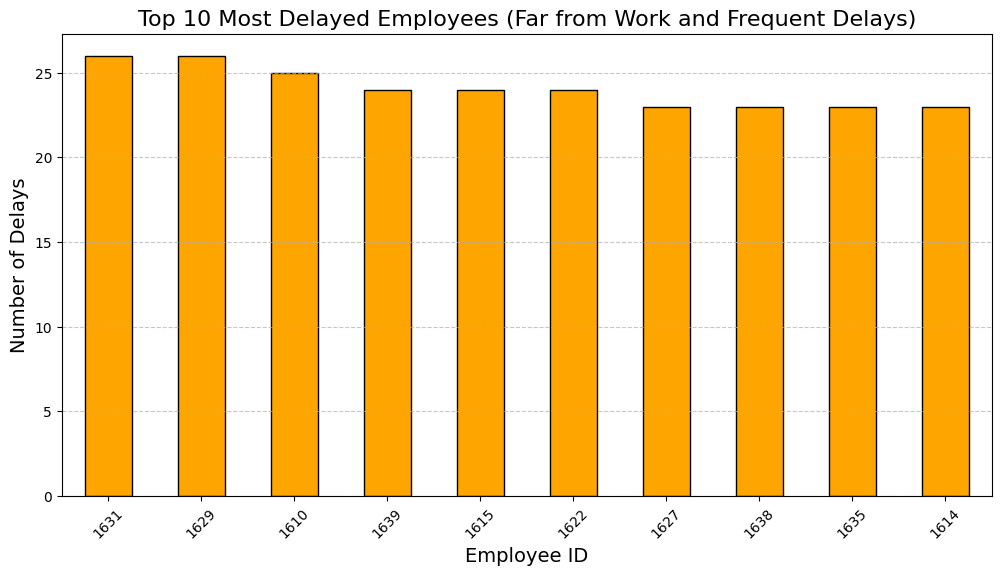

In [ ]:
import matplotlib.pyplot as plt

# Define thresholds
distance_threshold = 10000  # in meters
delay_threshold = 30  # in minutes

# Classify employees who are far from work and frequently delayed
employees_gdf['frequent_delays'] = employees_gdf['delay_minutes'] > delay_threshold
employees_gdf['far_from_work'] = employees_gdf['distance_to_work_meters'] > distance_threshold

# Filter employees who meet both conditions
frequent_and_far = employees_gdf[employees_gdf['frequent_delays'] & employees_gdf['far_from_work']]

# Count the number of delays per employee
most_delayed = frequent_and_far.groupby('employee_id')['delay_minutes'].count().sort_values(ascending=False)

# Visualize the most delayed employees
plt.figure(figsize=(12, 6))
most_delayed.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Delayed Employees (Far from Work and Frequent Delays)', fontsize=16)
plt.xlabel('Employee ID', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
# Maximum distance and corresponding employee
max_distance = employees_gdf['distance_to_work_meters'].max()
max_distance_employee = employees_gdf.loc[employees_gdf['distance_to_work_meters'].idxmax(), 'employee_id']

# Minimum delay and corresponding employee
min_delay = employees_gdf['delay_minutes'].min()
min_delay_employee = employees_gdf.loc[employees_gdf['delay_minutes'].idxmin(), 'employee_id']

# Employee with the most delays
most_delays_employee = most_delayed.idxmax()
most_delays_count = most_delayed.max()

# Date with the most delays
most_delays_date = employees.groupby('work_arrival_datetime')['delay_minutes'].count().idxmax()

# Combine all dates into a single time range
start_date = employees['work_arrival_datetime'].min().strftime('%Y-%m-%d')
end_date = employees['work_arrival_datetime'].max().strftime('%Y-%m-%d')

# Generate the summary report
summary_report = f"""
Summary Report:
---------------
1. Maximum Distance to Work: {max_distance:.2f} meters (Employee ID: {max_distance_employee})
2. Minimum Delay: {min_delay:.2f} minutes (Employee ID: {min_delay_employee})
3. Employee with the Most Delays: Employee ID {most_delays_employee} ({most_delays_count} delays)
4. Date with the Most Delays: {most_delays_date.strftime('%Y-%m-%d')}
"""

print(summary_report)


Summary Report:
---------------
1. Maximum Distance to Work: 57364.77 meters (Employee ID: 1616)
2. Minimum Delay: 0.05 minutes (Employee ID: 1612)
3. Employee with the Most Delays: Employee ID 1631 (26 delays)
4. Date with the Most Delays: 2025-05-03



In [63]:
# Calculate average delay for employees far from work
far_from_work_avg_delay = employees_gdf[employees_gdf['far_from_work']]['delay_minutes'].mean()

# Calculate average delay for employees not far from work
not_far_from_work_avg_delay = employees_gdf[~employees_gdf['far_from_work']]['delay_minutes'].mean()

# Compare the two averages
far_from_work_avg_delay, not_far_from_work_avg_delay

(np.float64(51.801638504864314), np.float64(52.127016129032256))